선형 맞춤을 시각화하는 데 사용할 수 있는 두 가지 함수는 regplot()및 입니다 lmplot().

가장 간단한 호출에서 두 함수는 두 변수의 산점도를 그린 x다음 y회귀 모델에 적합 하고 결과 회귀선과 해당 회귀에 대한 95% 신뢰 구간을 플로팅합니다.y ~ x

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

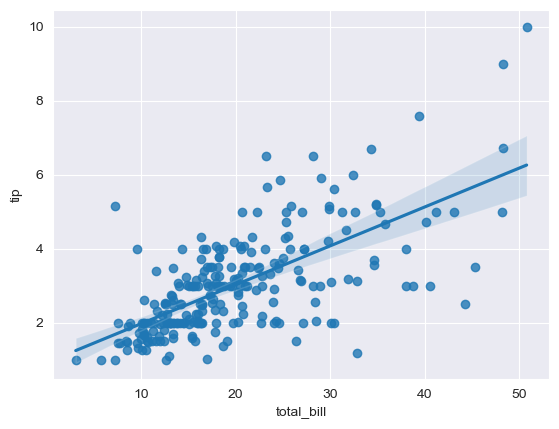

In [7]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

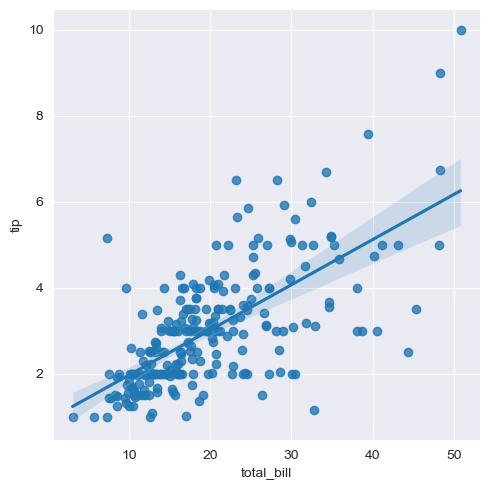

In [8]:
sns.lmplot(x="total_bill", y="tip", data=tips);

이러한 함수는 유사한 플롯을 그리지만 regplot()축 수준 함수 이고 lmplot()그림 수준 함수입니다. 또한 간단한 numpy 배열, 객체 또는 에 전달된 객체 의 변수에 대한 참조 를 비롯한 다양한 형식의 및 변수를 regplot()허용합니다 . 반대로 has는 필수 매개변수로, 및 변수는 문자열로 지정해야 합니다. 마지막으로 매개변수 로만 있습니다

변수 중 하나가 이산 값을 가질 때 선형 회귀를 맞추는 것이 가능하지만, 이러한 종류의 데이터 세트에서 생성된 단순 산점도는 종종 최적이 아닙니다.



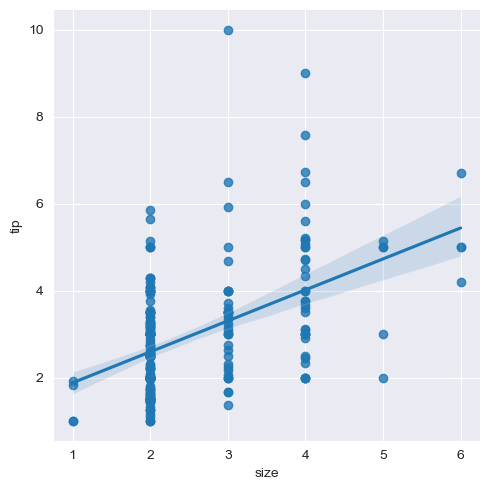

In [9]:
sns.lmplot(x="size", y="tip", data=tips);

두 번째 옵션은 신뢰 구간과 함께 중심 경향의 추정치를 플로팅하기 위해 각 개별 빈의 관측값을 축소하는 것입니다.



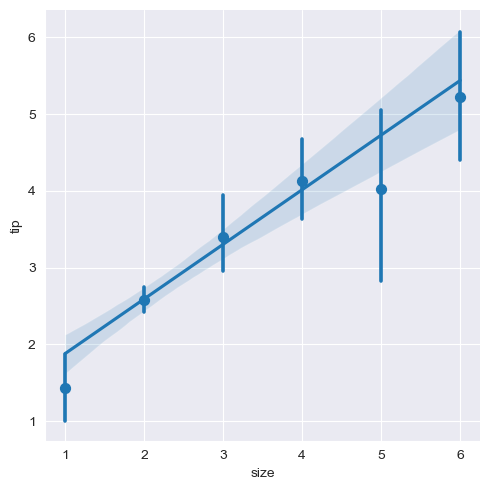

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

# Fitting different kinds of models

위에서 사용된 단순 선형 회귀 모델은 적합하기 매우 간단하지만 일부 종류의 데이터 세트에는 적합하지 않습니다. Anscombe 의 사중주 데이터 세트는 단순 선형 회귀가 단순한 육안 검사가 차이점을 명확하게 보여주는 관계의 동일한 추정치를 제공하는 몇 가지 예를 보여줍니다. 예를 들어 첫 번째 경우 선형 회귀는 좋은 모델입니다.



In [12]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


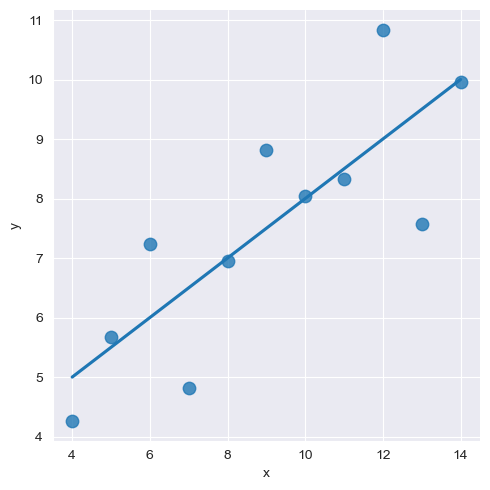

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

두 번째 데이터 세트의 선형 관계는 동일하지만 플롯은 이것이 좋은 모델이 아님을 분명히 보여줍니다.

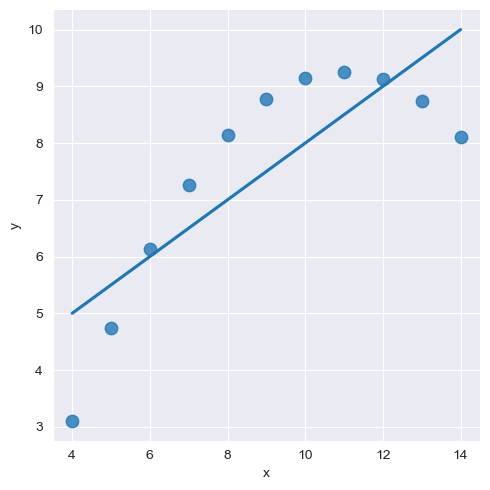

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

이러한 종류의 고차 관계가 있는 경우 다항식 회귀 모델에 적합하여 데이터 세트에서 간단한 유형의 비선형 추세를 탐색할 수 있습니다.

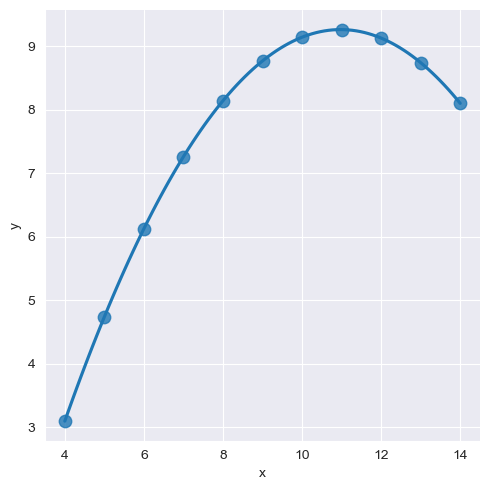

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

다른 문제는 연구 중인 주요 관계 이외의 이유로 이탈하는 "이상값" 관찰에 의해 제기됩니다.

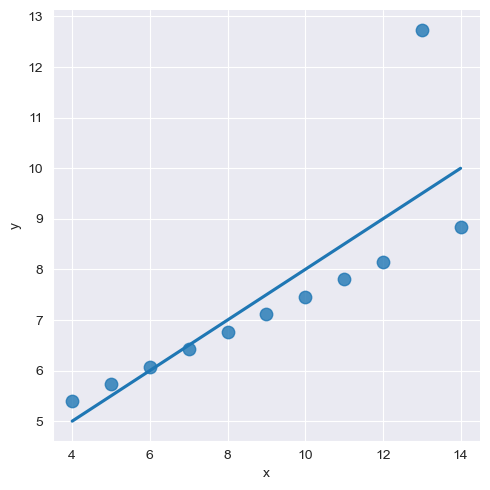

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

이상값이 있는 경우 다른 손실 함수를 사용하여 상대적으로 큰 잔차의 가중치를 줄이는 강력한 회귀를 맞추는 것이 유용할 수 있습니다.

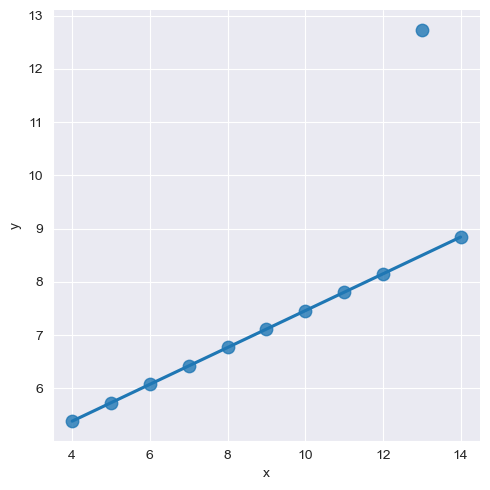

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

변수가 이진 이면 y단순 선형 회귀도 "작동"하지만 믿을 수 없는 예측을 제공합니다.

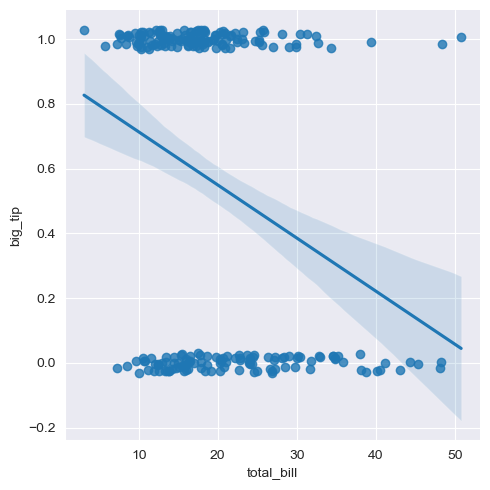

In [18]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

이 경우 솔루션은 로지스틱 회귀를 맞추는 것입니다. 회귀선은 주어진 값에 대한 추정 확률을 보여줍니다 .y = 1x



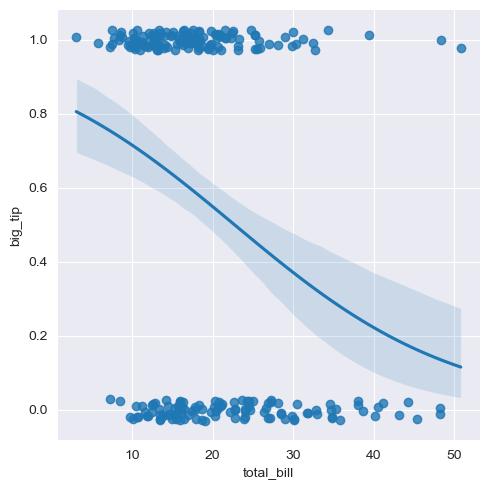

In [19]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

로지스틱 회귀 추정은 훨씬 더 계산적으로 집약적이라는 점에 유의하십시오(강력한 회귀의 경우에도 마찬가지임). 회귀선 주변의 신뢰 구간은 부트스트랩 절차를 사용하여 계산되므로 더 빠른 반복을 위해 이 기능을 해제할 수 있습니다( 사용 ci=None)

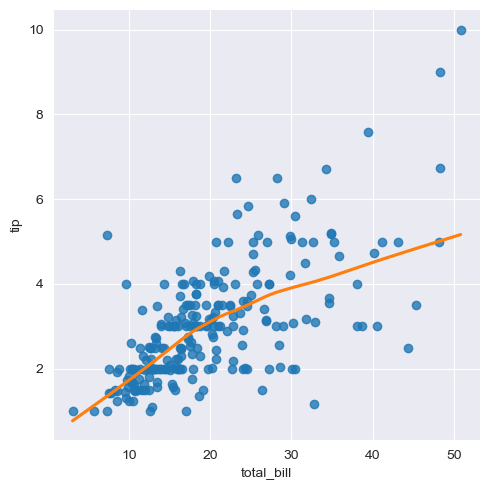

In [20]:
sns.lmplot(x="total_bill", y="tip", data=tips,lowess=True, line_kws={"color": "C1"});

이 residplot()함수는 단순 회귀 모델이 데이터 세트에 적합한지 여부를 확인하는 데 유용한 도구가 될 수 있습니다. 간단한 선형 회귀를 적합하고 제거한 다음 각 관찰에 대한 잔차 값을 플로팅합니다. 이상적으로는 이러한 값이 무작위로 흩어져 있어야 합니다 .y = 0



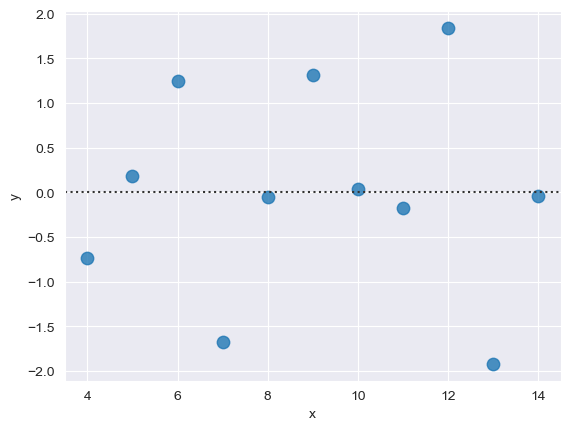

In [21]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

잔차에 구조가 있는 경우 단순 선형 회귀가 적절하지 않음을 나타냅니다.

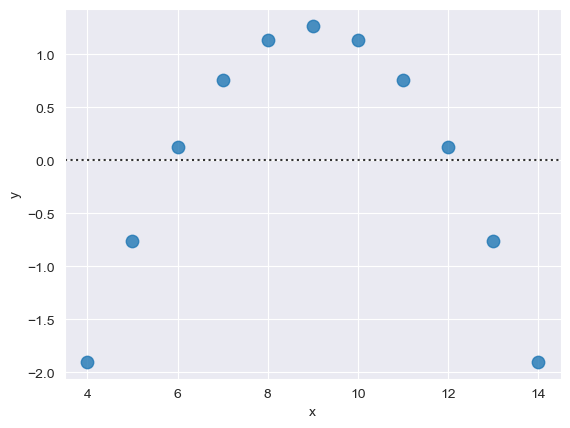

In [22]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});